In [1]:
from datasets import load_dataset,DatasetDict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import io
import os
from PIL import Image
import random
import torchvision.transforms as transforms
import utils
import torch.nn as nn

/home/omar/TUM/05_projects/Image_generation_with_VAE/vae_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("Karthik11232/human_face_generation")
#split the dataset 
train_test_set = ds['train'].train_test_split(test_size=0.2)
train_val_set = train_test_set['train'].train_test_split(test_size=0.2)

ds = DatasetDict({
    'train': train_test_set['train'],
    'test': train_test_set['test'],
    'validation': train_val_set['test']
})
print (ds)
print(ds.shape)
print(train_test_set.shape)
print(train_val_set.shape)

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 2132
    })
    test: Dataset({
        features: ['image'],
        num_rows: 533
    })
    validation: Dataset({
        features: ['image'],
        num_rows: 427
    })
})
{'train': (2132, 1), 'test': (533, 1), 'validation': (427, 1)}
{'train': (2132, 1), 'test': (533, 1)}
{'train': (1705, 1), 'test': (427, 1)}


In [3]:
# Save the datasets to disk
output_dir = './human_face_generation_split/raw'
if not os.path.exists(output_dir):  
    os.makedirs(output_dir, exist_ok=True)
# Save each split to disk
    utils.save_images(ds['train'], 'train',output_dir)
    utils.save_images(ds['validation'], 'validation')
    utils.save_images(ds['test'], 'test')

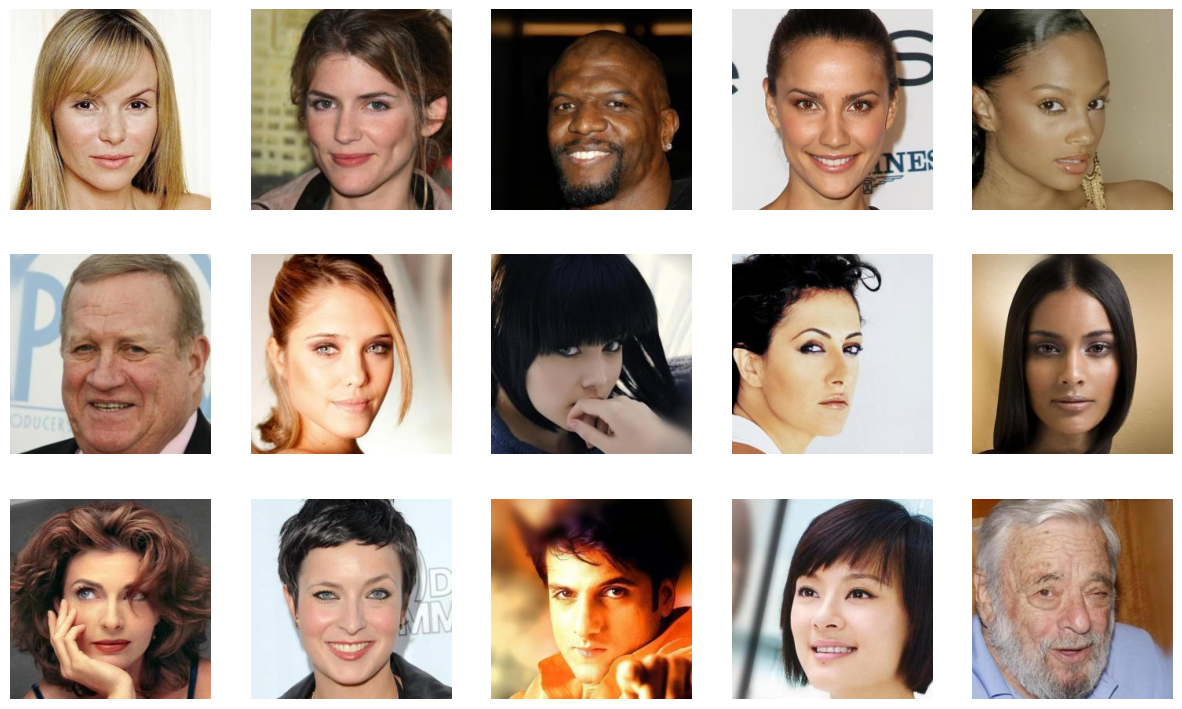

In [4]:
# Plot 15 random images in 3 rows and 5 columns
utils.plot_random_images(dataset_path='human_face_generation_split/raw/train', num_images=15, rows=3, cols=5)

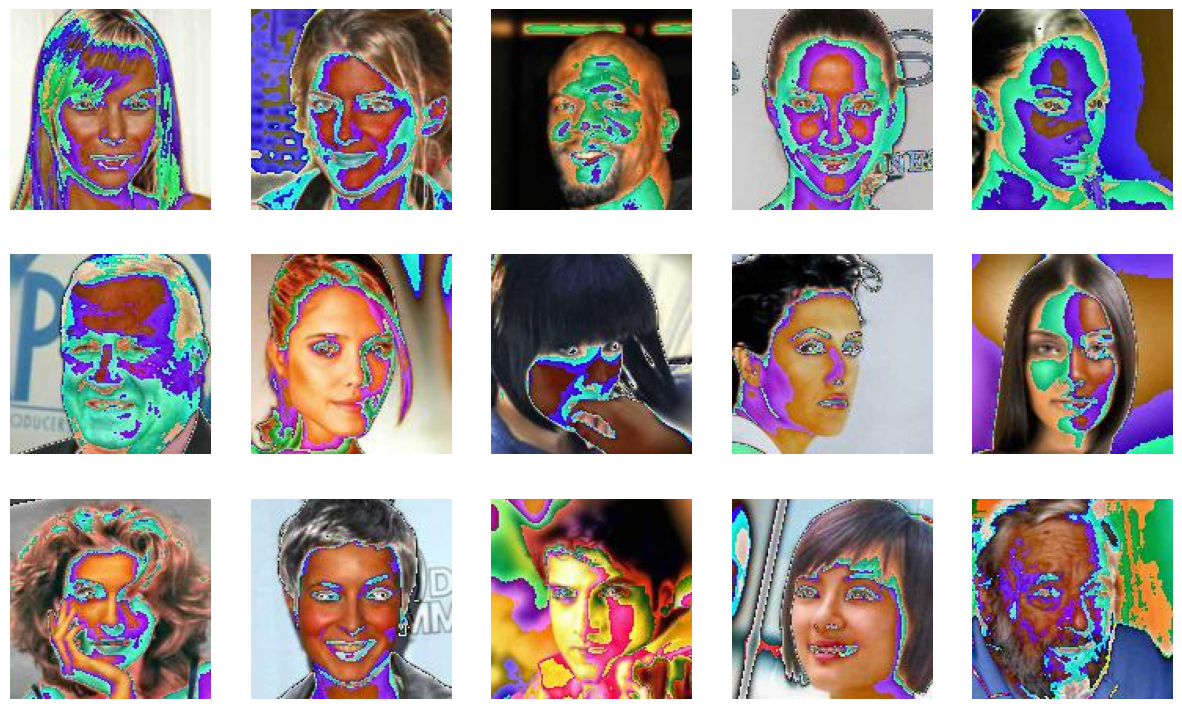

In [5]:
# Prepoccessing 
preprocess = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to a specific size if needed
    transforms.ToTensor(),          # Convert to tensor and normalize
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
preprocessed_output_dir = './human_face_generation_split/preprocessed'
os.makedirs(preprocessed_output_dir, exist_ok=True)
if not os.path.exists(preprocessed_output_dir):
# Save preprocessed training images
    utils.save_images(ds['train'], 'train', preprocessed_output_dir,preprocess=preprocess)
utils.plot_random_images(os.path.join(preprocessed_output_dir, 'train'), num_images=15, rows=3, cols=5)

In [6]:
# first implement a simple Autoencoder 
#class Autoencoder(nn.Module):